## Import Data

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pickle

In [34]:
train_data = pd.read_csv('data_training_80.csv',)
test_data = pd.read_csv('data_testing_20.csv',)
train_data

,musicId,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,arousal(mean),valence(mean)
0,244,0.736870,0.819360,0.363572,0.674912,0.608155,0.721918,0.418320,0.215462,0.519016,...,0.918557,0.866757,0.697559,0.777787,0.731747,0.770166,0.781191,0.798252,0.287500,0.412500
1,12,0.518414,0.334808,0.888076,0.680080,0.625788,0.554501,1.000000,0.551382,0.319966,...,0.547005,0.493716,0.348376,0.504628,0.348218,0.258203,0.261488,0.543882,0.687500,0.575000
2,60,0.848720,0.664322,0.554515,0.780982,0.373103,0.591311,0.648466,0.302966,0.530206,...,0.426591,0.545657,0.572830,0.859357,0.381036,0.377555,0.464152,0.509618,0.420455,0.409091
3,217,0.611904,0.564931,0.613551,0.467711,0.596542,0.623836,0.488641,0.243492,0.617306,...,0.528625,0.604054,0.141768,0.109834,0.095798,0.277068,0.379223,0.258459,0.612500,0.575000
4,273,0.602871,0.748947,0.539451,0.800582,0.560585,0.638552,0.733598,0.272808,0.707519,...,0.844177,0.695128,0.642626,0.762079,0.701334,0.770606,0.664851,0.745226,0.337500,0.362500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,144,0.839844,0.781357,0.436745,0.402436,0.479489,0.696192,0.717142,0.142091,0.396126,...,0.391911,0.472605,0.403027,0.489313,0.348634,0.660650,0.747129,0.565518,0.862500,0.825000
195,316,0.854586,0.929686,0.320021,0.387621,0.601151,0.454913,0.385334,0.217281,0.393628,...,0.797402,0.706248,0.592063,0.664048,0.687965,0.678531,0.658530,0.768999,0.887500,0.862500
196,224,0.573366,0.675094,0.648893,0.667260,0.794199,1.000000,0.808637,0.316829,0.525087,...,0.855340,0.730280,0.507312,0.520237,0.495118,0.656808,0.726789,0.669540,0.587500,0.500000
197,40,0.732544,0.601373,0.548688,0.707527,0.474967,0.850064,0.465982,0.243383,0.735805,...,0.485750,0.507460,0.517761,0.712468,0.480726,0.482424,0.413377,0.321743,0.375000,0.662500


In [35]:
train_data = np.array(train_data)
test_data = np.array(test_data)
#the number of columns
len_data = np.size(train_data,axis=1)
train_data

array([[2.44000000e+02, 7.36869592e-01, 8.19359594e-01, ...,
        7.98251739e-01, 2.87500000e-01, 4.12500000e-01],
       [1.20000000e+01, 5.18413726e-01, 3.34808395e-01, ...,
        5.43882027e-01, 6.87500000e-01, 5.75000000e-01],
       [6.00000000e+01, 8.48720285e-01, 6.64322157e-01, ...,
        5.09617934e-01, 4.20454545e-01, 4.09090909e-01],
       ...,
       [2.24000000e+02, 5.73366278e-01, 6.75094159e-01, ...,
        6.69539755e-01, 5.87500000e-01, 5.00000000e-01],
       [4.00000000e+01, 7.32544384e-01, 6.01372963e-01, ...,
        3.21742788e-01, 3.75000000e-01, 6.62500000e-01],
       [2.95000000e+02, 7.13358642e-01, 5.74845349e-01, ...,
        7.03539363e-01, 7.25000000e-01, 7.50000000e-01]])

In [36]:
#separate musicId, features, arousal(mean), valence(mean) in training data
musicId_train = np.int_(train_data[:,0:1])
features_train = train_data[:,1:len_data-2]
number_of_features = np.size(features_train[0],axis=0)
arousal_mean_train = train_data[:,len_data-2]
valence_mean_train = train_data[:,len_data-1]

In [37]:
musicId_train[0]

array([244])

In [38]:
#separate musicId, features, arousal(mean), valence(mean) in testing data
musicId_test = np.int_(test_data[:,0:1])
features_test = test_data[:,1:len_data-2]
number_of_features = np.size(features_test[0],axis=0)
arousal_mean_test = test_data[:,len_data-2]
valence_mean_test = test_data[:,len_data-1]

In [39]:
arousal_mean_train[0]

0.2875

In [40]:
valence_mean_train[0]

0.4125

## Regression

#### Linear Regression for Multioutput Regression

In [41]:
X = features_train
y = train_data[:,len_data-2:len_data]
linear_model = LinearRegression()
linear_model.fit(X, y)
ypred_linear = linear_model.predict(features_train)
# print(ypred_linear)

In [42]:
yactual_train = train_data[:,len_data-2:len_data]

#### k-Nearest Neighbors for Multioutput Regression

In [43]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
ypred_knn = knn_model.predict(features_train)

#### Decision Tree for Multioutput Regression

In [56]:
dectree_model = DecisionTreeRegressor()
dectree_model.fit(X, y)
ypred_dectree = dectree_model.predict(features_train)

## Evaluating

In [58]:
linear_mse = mean_squared_error(yactual_train, ypred_linear)
knn_mse = mean_squared_error(yactual_train, ypred_knn)
dectree_mse = mean_squared_error(yactual_train, ypred_dectree)
linear_rmse = sqrt(linear_mse)
knn_rmse = sqrt(knn_mse)
dectree_rmse = sqrt(dectree_mse)
print("RMSE linear regression: "+str(linear_rmse))
print("RMSE knn regression: "+str(knn_rmse))
print("RMSE decision tree regression: "+str(dectree_rmse))

RMSE linear regression: 0.10339321810115193
RMSE knn regression: 0.1219569042423555
RMSE decision tree regression: 0.0034603370010454224


In [59]:
ytrain_pred = pd.DataFrame(yactual_train)
ytrain_pred["pred_lin_aro(mean)"]=ypred_linear[:,0]
ytrain_pred["pred_lin_val(mean)"]=ypred_linear[:,1]
ytrain_pred["pred_knn_aro(mean)"]=ypred_knn[:,0]
ytrain_pred["pred_knn_val(mean)"]=ypred_knn[:,1]
ytrain_pred["pred_dectree_aro(mean)"]=ypred_dectree[:,0]
ytrain_pred["pred_dectree_val(mean)"]=ypred_dectree[:,1]
ytrain_pred

,0,1,pred_lin_aro(mean),pred_lin_val(mean),pred_knn_aro(mean),pred_knn_val(mean),pred_dectree_aro(mean),pred_dectree_val(mean)
0,0.287500,0.412500,0.413640,0.402486,0.355000,0.375000,0.287500,0.412500
1,0.687500,0.575000,0.541234,0.557953,0.582500,0.655000,0.687500,0.575000
2,0.420455,0.409091,0.564560,0.590901,0.511591,0.619318,0.420455,0.409091
3,0.612500,0.575000,0.651716,0.644837,0.650000,0.662500,0.612500,0.575000
4,0.337500,0.362500,0.380971,0.358706,0.327500,0.357500,0.337500,0.362500
...,...,...,...,...,...,...,...,...
194,0.862500,0.825000,0.772718,0.787109,0.677500,0.702500,0.862500,0.825000
195,0.887500,0.862500,0.783816,0.738239,0.722500,0.752500,0.906250,0.862500
196,0.587500,0.500000,0.385898,0.409376,0.442500,0.390000,0.587500,0.500000
197,0.375000,0.662500,0.510319,0.639237,0.471591,0.569318,0.375000,0.662500


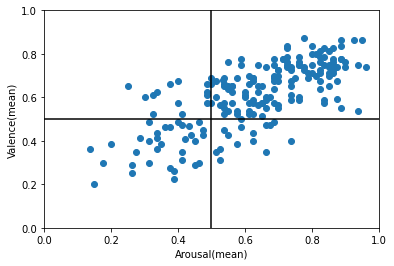

In [46]:
#cek persebaran data
plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')
plt.xlabel("Arousal(mean)")
plt.ylabel("Valence(mean)")
plt.scatter(yactual_train[:,0],yactual_train[:,1])

plt.show()

### save model

In [60]:
pickle.dump(linear_model, open('linear_model_mean.sav', 'wb'))
pickle.dump(knn_model, open('knn_model_mean.sav', 'wb'))
pickle.dump(dectree_model, open('dectree_model_mean.sav', 'wb'))

### load model

In [48]:
yactual_test = test_data[:,len_data-2:len_data]

In [49]:
loaded_model_linear = pickle.load(open('linear_model_mean.sav', 'rb'))
loaded_model_knn = pickle.load(open('knn_model_mean.sav', 'rb'))
loaded_model_dectree = pickle.load(open('dectree_model_mean.sav', 'rb'))
# result = loaded_model_linear.score(features_test,yactual_test)
# print(result)

In [50]:
yactual_test

array([[0.5625    , 0.3625    ],
       [0.85      , 0.7625    ],
       [0.3625    , 0.7375    ],
       [0.675     , 0.7       ],
       [0.675     , 0.65      ],
       [0.4375    , 0.3625    ],
       [0.875     , 0.775     ],
       [0.5125    , 0.525     ],
       [0.75      , 0.7125    ],
       [0.5       , 0.8       ],
       [0.7       , 0.675     ],
       [0.4125    , 0.275     ],
       [0.625     , 0.6125    ],
       [0.8125    , 0.85      ],
       [0.4       , 0.4625    ],
       [0.925     , 0.625     ],
       [0.7375    , 0.5       ],
       [0.275     , 0.3875    ],
       [0.6875    , 0.8375    ],
       [0.65      , 0.6625    ],
       [0.6375    , 0.6375    ],
       [0.3875    , 0.4375    ],
       [0.7       , 0.675     ],
       [0.8125    , 0.825     ],
       [0.6875    , 0.675     ],
       [0.7375    , 0.825     ],
       [0.8125    , 0.725     ],
       [0.4       , 0.5       ],
       [0.7625    , 0.7       ],
       [0.7125    , 0.625     ],
       [0.

In [51]:
ypred_test_linear = loaded_model_linear.predict(features_test)
ypred_test_knn = loaded_model_knn.predict(features_test)

In [52]:
linear_mse = mean_squared_error(yactual_test, ypred_test_linear)
knn_mse = mean_squared_error(yactual_test, ypred_test_knn)
linear_rmse = sqrt(linear_mse)
knn_rmse = sqrt(knn_mse)
print("RMSE linear regression: "+str(linear_rmse))
print("RMSE knn regression: "+str(knn_rmse))

RMSE linear regression: 0.17069559409252935
RMSE knn regression: 0.1351426143225577


In [53]:
ytest_pred = pd.DataFrame(yactual_test)
ytest_pred["pred_lin_aro(mean)"]=ypred_test_linear[:,0]
ytest_pred["pred_lin_val(mean)"]=ypred_test_linear[:,1]
ytest_pred["pred_knn_aro(mean)"]=ypred_test_knn[:,0]
ytest_pred["pred_knn_val(mean)"]=ypred_test_knn[:,1]
ytest_pred

,0,1,pred_lin_aro(mean),pred_lin_val(mean),pred_knn_aro(mean),pred_knn_val(mean)
0,0.562500,0.362500,0.523794,0.426087,0.330000,0.342500
1,0.850000,0.762500,0.813059,0.785899,0.642500,0.662500
2,0.362500,0.737500,0.585928,0.609991,0.585000,0.630000
3,0.675000,0.700000,0.654165,0.642758,0.822500,0.777500
4,0.675000,0.650000,0.631750,0.628204,0.650000,0.660000
5,0.437500,0.362500,0.317537,0.350244,0.472500,0.460000
6,0.875000,0.775000,0.689641,0.620078,0.692500,0.687500
7,0.512500,0.525000,0.544178,0.634992,0.525000,0.570000
8,0.750000,0.712500,0.849759,0.711252,0.629091,0.649318
9,0.500000,0.800000,0.518390,0.532473,0.600000,0.585000


### Scatter plot of data testing

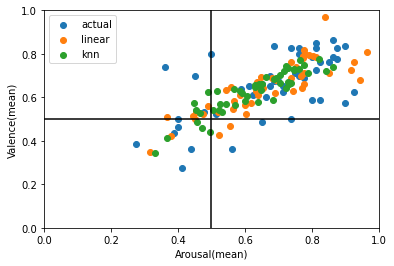

In [54]:
import matplotlib.pyplot as plt
plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')
plt.xlabel("Arousal(mean)")
plt.ylabel("Valence(mean)")
plt.scatter(yactual_test[:,0],yactual_test[:,1],label="actual")
plt.scatter(ypred_test_linear[:,0],ypred_test_linear[:,1],label="linear")
plt.scatter(ypred_test_knn[:,0],ypred_test_knn[:,1],label="knn")
plt.legend()
plt.show()